#### 6) ML models' prediction probabilities: Results aggregated across stratified 5-fold CVs variants, 16 full supported variants & covariates only 


#### Introduction 

We aggregated the results from ML classifiers' prediction probabilities in each folds (SVC, Logistic Reg., Random Forest and XGBoost) using the median/mode descriptive statistics method. That is, we took the median score of the four ML algorithms across the 5-folds CV and binarized their severity grouping by assigning severe ("1") to median values greater than or equal to 0.5 and asymptomatic ("0") to median values less than 0.5. 

We priotize results from decision tree-like models (Random Forest and XGBoost classifier) in order to make biological interpretations to variants that received non-zero weights (feature importance coefficients) during training using the best GridSearchCV hyperparameter values for the ML estimators.

The "aggregated_median_prediction_probabilities_5_folds_full_support_covariates.csv": this basically contained the results from Random Forest and XGBoost models:
1. when all the variants are used (removal of multicollinearity) and covariates across the 5-folds; 

2. 16 fully supported non-zero variants (i.e., we considered variants that only received non-zero weights consistently across the 5-fold in the decision tree-like models);

3. and covariates (i.e., we considered modeling across the 5-folds using gender and sex only). 

**Note**: 1, 2, 3 in the CSV table header denote the various forms of feature count prediction probabilities results we considered.

In [15]:
# import relevant libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
### AUC libraries 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [2]:
# import CSV file containing prediction probabilities from each ML classifier 
fs="\t"
path="/Users/Hp/Desktop/2000_cohort_analysis/"

df = pd.read_csv(path + "combined_median_predictions_probabilities_16_variants_with_covariates_without_and_covariates_only_3000.csv", delimiter=',', quotechar='"', index_col='sample_ID')

df.head()

,grouping,combined_median_prob_with_covariates,combined_median_predicted_grouping_with_covariates,combined_median_prob_without_covariates,combined_median_predicted_grouping_without_covariates,combined_median_prob_covariates_only,combined_median_predicted_grouping_covariates_only
sample_ID,,,,,,,
AR-COVID3-USC-AREZZO_hg38,0,0.264980,0,0.889863,1,0.684775,1
BS-COV-56_hg38,1,0.246329,0,0.850523,1,0.240979,0
BS-COV-83_hg38,1,0.527802,1,0.870020,1,0.323792,0
COV10001-3742_hg38,1,0.731608,1,0.869362,1,0.735236,1
COV10013-3746_hg38,1,0.448958,0,0.686186,1,0.837605,1


In [3]:
# prepare the dataset  
y = df['grouping']

y_med_1 = df['combined_median_predicted_grouping_with_covariates']

y_med_2 = df['combined_median_predicted_grouping_without_covariates']

y_med_3 = df['combined_median_predicted_grouping_covariates_only']
#X_val = df.drop('grouping', 1)
y_test = y.values

In [4]:
# define prediction probabilities 
probs_med = df['combined_median_prob_with_covariates'] # all variants+multi-coll. across 5-folds CV

probs_med_1 = df['combined_median_prob_without_covariates'] # 16 fully supported variants across 5-folds CV

probs_med_2 = df['combined_median_prob_covariates_only'] # Only covariates across 5-fold CVs 

#### All variants+multi-coll. across 5-folds CV

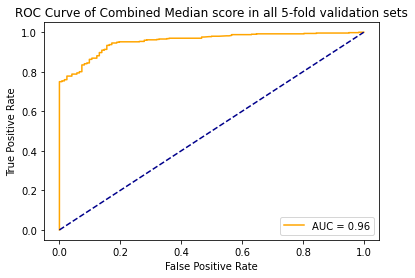

In [5]:
# Define AUC-ROC parameters 
auc_med = roc_auc_score(y_test, probs_med)
fpr_med, tpr_med, thresholds = roc_curve(y_test, probs_med)

def plot_roc_curve(fpr_med, tpr_med):
    plt.plot(fpr_med, tpr_med, color='orange', label = 'AUC = %0.2f' % auc_med)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of Combined Median score in all 5-fold validation sets')
    plt.legend()
    plt.show()
plot_roc_curve(fpr_med, tpr_med)

#### 16 Fully supported variants across 5-fold decision-tree like models

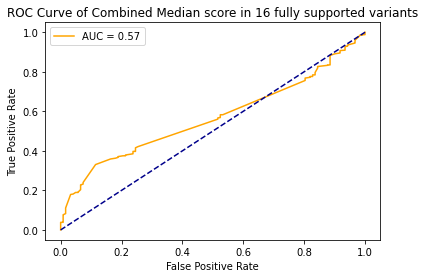

In [6]:
# Define AUC-ROC parameters 
auc_med_1 = roc_auc_score(y_test, probs_med_1)
fpr_med_1, tpr_med_1, thresholds = roc_curve(y_test, probs_med_1)

def plot_roc_curve(fpr_med_1, tpr_med_1):
    plt.plot(fpr_med_1, tpr_med_1, color='orange', label = 'AUC = %0.2f' % auc_med_1)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of Combined Median score in 16 fully supported variants')
    plt.legend()
    plt.show()
plot_roc_curve(fpr_med_1, tpr_med_1)

#### Only Covariates (Age and Sex) across 5-folds CV 

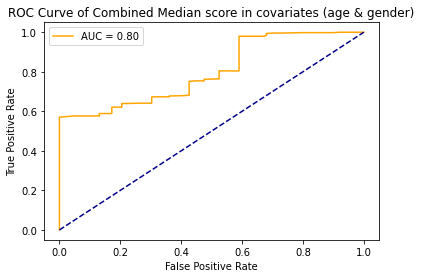

In [7]:
# Define AUC-ROC parameters 
auc_med_2 = roc_auc_score(y_test, probs_med_2)
fpr_med_2, tpr_med_2, thresholds = roc_curve(y_test, probs_med_2)

def plot_roc_curve(fpr_med_2, tpr_med_2):
    plt.plot(fpr_med_2, tpr_med_2, color='orange', label = 'AUC = %0.2f' % auc_med_2)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of Combined Median score in covariates (age & gender)')
    plt.legend()
    plt.show()
plot_roc_curve(fpr_med_2, tpr_med_2)

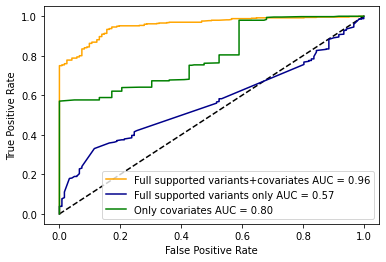

In [8]:
### Combine ROC curve for all  classifiers follow-up 3000 cohort dataset
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_med, tpr_med, color='orange', label = "Full supported variants+covariates AUC = %0.2f" % auc_med)
plt.plot(fpr_med_1, tpr_med_1, color='darkblue',  label = "Full supported variants only AUC = %0.2f" % auc_med_1)
plt.plot(fpr_med_2, tpr_med_2, color='green', label = "Only covariates AUC = %0.2f" % auc_med_2)
#plt.plot(fpr_med_2, tpr_med_2, label = "XGBoost AUC = %0.2f" % auc_med_2)


plt.legend()
#place legend in top right corner
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('ROC: Combined Median score all variants in 5-folds CV,\n fully supported variants from decision tree-like models and covariates only')
# save figure
plt.savefig(path+'Figure_2E.pdf', bbox_inches="tight")

In [9]:
# Import dataset for combined probabilities in fully supported variants supervised ML analysis
s="\t"
path="/Users/Hp/Desktop/2000_cohort_analysis/"
# import dataset for validation  
df_1 = pd.read_csv(path+"combine_all_probabilities_16_full_support.csv", delimiter=',',
                 quotechar='"')
df_1.head()

,sample_ID,grouping,predicted_grouping_XGBoost_1,predicted_prob_XGBoost_1,combined_median_probabilities_1,combined_predicted_median_score_1,combined_median_probabilities_RF_XGBoost_1,combined_predicted_median_score_RF_XGBoost_1,predicted_grouping_XGBoost_2,predicted_prob_XGBoost_2,combined_median_probabilities_2,combined_predicted_median_score_2,combined_median_probabilities_RF_XGBoost_2,combined_predicted_median_score_RF_XGBoost_2,predicted_grouping_XGBoost_3,predicted_prob_XGBoost_3,combined_median_probabilities_3,combined_predicted_median_score_3,combined_median_probabilities_RF_XGBoost_3,combined_predicted_median_score_RF_XGBoost_3
0,AR-COV-10_hg38,1,1,0.866519,0.801279,1,0.741556,1,0,0.464099,0.442679,0,0.451842,0,1,0.662149,0.852025,1,0.726931,1
1,AR-COV-11_hg38,1,1,0.513780,0.476244,0,0.497253,0,1,0.546722,0.508551,1,0.498495,0,0,0.478077,0.446996,0,0.407590,0
2,AR-COV-14_hg38,1,1,0.972255,0.915864,1,0.933026,1,1,0.960243,0.877813,1,0.935721,1,1,0.659141,0.734691,1,0.667949,1
3,AR-COV-15_hg38,1,0,0.176352,0.229434,0,0.455356,0,1,0.544107,0.498660,0,0.479000,0,0,0.356441,0.246948,0,0.285388,0
4,AR-COV-18_hg38,1,0,0.377232,0.403928,0,0.311263,0,1,0.546722,0.508551,1,0.498495,0,1,0.513174,0.514682,1,0.514682,1


In [10]:
# prepare the dataset  
y = df_1['grouping']

y_med_1 = df_1['combined_predicted_median_score_1']

y_med_2 = df_1['combined_predicted_median_score_2']

y_med_3 = df_1['combined_predicted_median_score_3']

y_test = y.values

In [11]:
# define prediction probabilities 

probs_med = df_1['combined_median_probabilities_1'] # all variants+multi-coll. across 5-folds CV

probs_med_1 = df_1['combined_median_probabilities_2'] # 16 fully supported variants across 5-folds CV

probs_med_2 = df_1['combined_median_probabilities_3'] # Only covariates across 5-fold CVs 

In [12]:
# Define AUC-ROC parameters for each of the 3 combined probabilities 

auc_med = roc_auc_score(y_test, probs_med)
fpr_med, tpr_med, thresholds = roc_curve(y_test, probs_med)

auc_med_1 = roc_auc_score(y_test, probs_med_1)
fpr_med_1, tpr_med_1, thresholds = roc_curve(y_test, probs_med_1)



auc_med_2 = roc_auc_score(y_test, probs_med_2)
fpr_med_2, tpr_med_2, thresholds = roc_curve(y_test, probs_med_2)


Text(0, 0.5, 'True Positive Rate')

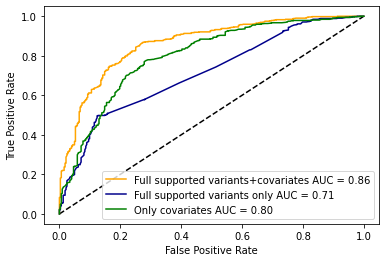

In [14]:
# Visualize combined probabilities AUC_ROC
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_med, tpr_med, color='orange',  label = "Full supported variants+covariates AUC = %0.2f" % auc_med)
plt.plot(fpr_med_1, tpr_med_1, color='darkblue', label = "Full supported variants only AUC = %0.2f" % auc_med_1)
plt.plot(fpr_med_2, tpr_med_2, color='green', label = "Only covariates AUC = %0.2f" % auc_med_2)
#plt.plot(fpr_med_2, tpr_med_2, label = "XGBoost AUC = %0.2f" % auc_med_2)


plt.legend()
#place legend in top right corner
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.legend(loc = 'lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('ROC: Combined Median score all variants in 5-folds CV,\n fully supported variants from decision tree-like models and covariates only')
# Save figure
plt.savefig(path+'Figure_2D.pdf', bbox_inches="tight")